# How to reduce interest paid on your Loans
## by Alex Paz

## Investigation Overview

> In this investigation, I wanted to study the variables that influence:
- lower interest rates for borrowers
- default and chargedoff percentages

## Dataset Overview

> The chosen dataset is comprised of over 113,000 loan listings on a peer-to-peer lending platform (Prosper), from 2005 to 2014.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# converting into ordered categorical column types

cat_order = {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                             '$50,000-74,999', '$75,000-99,999', '$100,000+'],
            'LoanStatus': ['Cancelled', 'Past Due (>120 days)', 'FinalPaymentInProgress', 'Past Due (16-30 days)', 
                           'Past Due (91-120 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)',
                           'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 'Completed', 'Current'],
            'EmploymentStatus': ['Other', 'Not available', 'Not employed', 'Part-time', 'Self-employed',
                                 'Full-time', 'Employed', 'Retired']}
"""for column in cat_order:
    print(column)"""

for column in cat_order:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=cat_order[column])
    loans[column] = loans[column].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How is the borrowing annual rate distributed along 113k loans?

> First, a quick look on the counts for different borrowing rates.


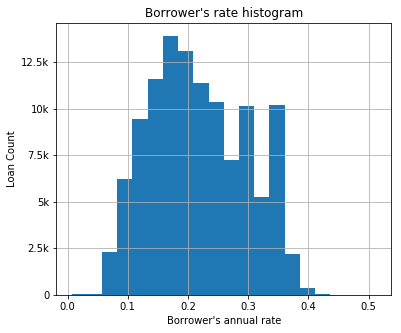

In [16]:
# annual Borrower interest rates distribution
plt.figure(figsize=[6,5])

# trying different bins on subplots
loans.BorrowerAPR.hist(bins=20)
plt.ylabel('Loan Count')
plt.xlabel("Borrower's annual rate")
y_locs = np.arange(0, 12_500+2500, 2500)
y_labels = ['0','2.5k', '5k', '7.5k', '10k', '12.5k']
plt.yticks(y_locs, y_labels)
plt.title("Borrower's rate histogram");

> The most common rate is around 0.17 per annum, with peaks also on 0.3 and around 0.35

## Could a lower Debt to Income ratio be related to the borrowing interest rate?

> Let's see a scatter plot from a 500-listing random sample

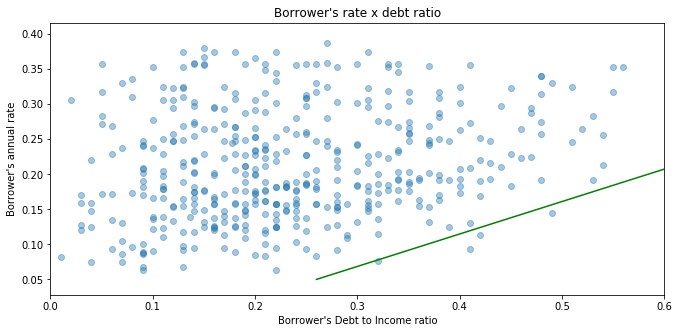

In [18]:
loan_sample = loans.sample(500)
plt.figure(figsize=[11,5])

plt.scatter(data=loan_sample, x='DebtToIncomeRatio', y='BorrowerAPR', alpha=0.4)
plt.xlim(0,0.6) # zoom on where dots are concentrated
plt.xlabel("Borrower's Debt to Income ratio")
plt.ylabel("Borrower's annual rate")
plt.title("Borrower's rate x debt ratio")
plt.plot([0.26, 0.8], [0.05, 0.3], c='g');



> We can observe a stronger influence of the Debt ratio on the Borrowing rate after the ratio reaches around 0.3, when it pushes interests upwards. However, what we are most interested is what one could do to lower one's interest rate, and below a certain debt ratio threshold, that variable doesn't seem to be particularly relevant.

## Maybe understanding default percentages can help!



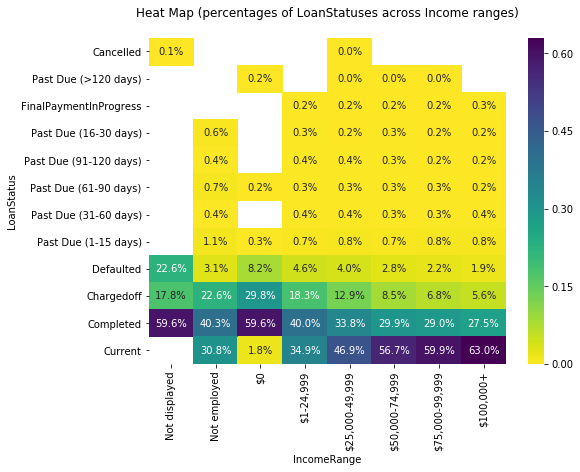

In [26]:
# counts for categories of interest
counts = loans.groupby(['LoanStatus', 'IncomeRange']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='LoanStatus', columns = 'IncomeRange', values='count')

# turn them into proportions
props = counts / counts.sum()

# plot
plt.figure(figsize=[8,6])
sb.heatmap(props, annot=True, cmap='viridis_r', fmt='.1%')
plt.title('Heat Map (percentages of LoanStatuses across Income ranges)\n');

> Notice the `Defaulted` row: starting from 8.2%, the green shade progressively fades into yellowish tones and the percentages are unambiguous:

> **As a general rule, on this dataset,
the higher the** _income range_, **the lower the** _default_ and _chargedoff_ **rates are.**


## What if lower income borrowers have higher default rates precisely because they are  offered higher interests?

## Could this result be biased?

> Let's select only lower interest loans (below 0.13) and find out!

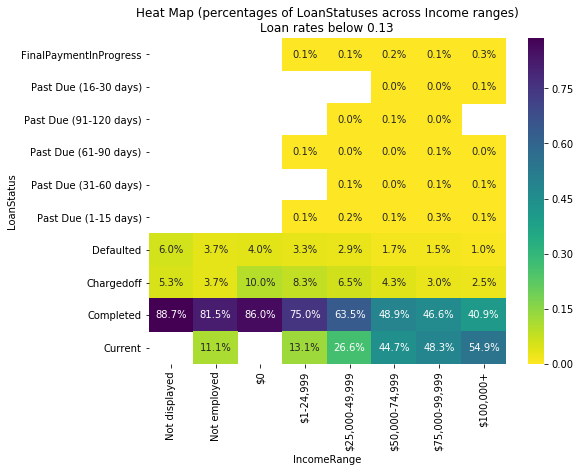

In [25]:
# controlling for borrowerAPR 
low_int_loans = loans[loans.BorrowerAPR < 0.13]

# counts for categories of interest
counts = low_int_loans.groupby(['LoanStatus', 'IncomeRange']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='LoanStatus', columns = 'IncomeRange', values='count')

# turn them into proportions
props = counts / counts.sum()

# plot
plt.figure(figsize=[8,6])
sb.heatmap(props, annot=True, cmap='viridis_r', fmt='.1%')
plt.title('Heat Map (percentages of LoanStatuses across Income ranges)\nLoan rates below 0.13');

> Even when controlling for borrowing rates, the same trend still holds. The higher your income range, the less likely you will be to default and that will reflect on the rate offered to you. 

## Short Conclusion


> If you want to pay less interest on your loans, make more money!!


<!--div style='text-align: center'> </div -->
"A bank is a place that will lend you money if you can prove that you don't need it." 

(_attributed to_ Bob Hope)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!